<a href="https://colab.research.google.com/github/Athul64/ML_Assignment_1_Statistical_Measures/blob/main/ML_Assignment_1_Statistical_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [ ]:
df=pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# **Q1. Perform basic EDA **

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [ ]:
df.shape

(13200, 7)

In [ ]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [ ]:
df['price_per_sqft']=df['price_per_sqft'].astype(float)
df['price_per_sqft'].dtypes

dtype('float64')

In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
(df.isnull().sum()/(len(df)))*100

,0
location,0.0
size,0.0
total_sqft,0.0
bath,0.0
price,0.0
bhk,0.0
price_per_sqft,0.0


In [ ]:
df.nunique()

,0
location,241
size,31
total_sqft,1972
bath,19
price,1952
bhk,19
price_per_sqft,4951


In [ ]:
df.duplicated().sum()

1049

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

<ipython-input-149-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

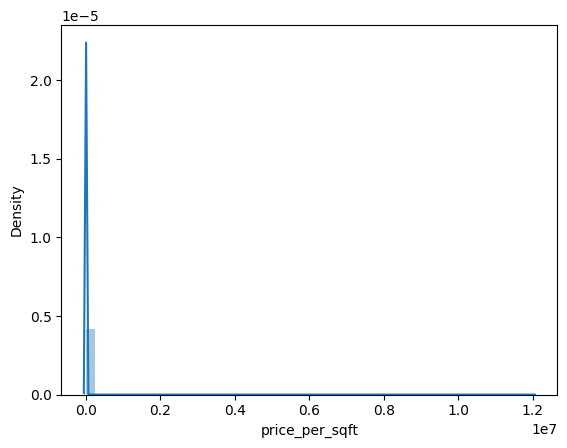

In [ ]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

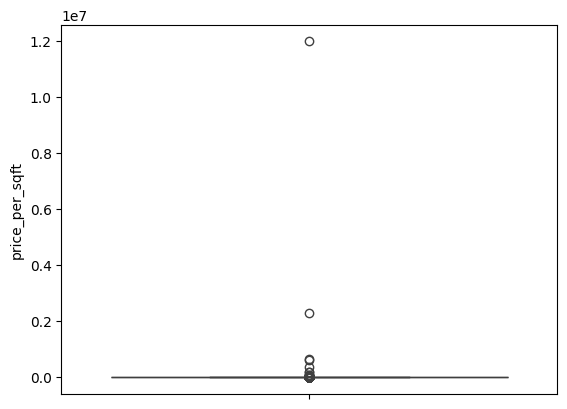

In [ ]:
sns.boxplot(df['price_per_sqft'])

create a box plot and distplot to visualize the distribution of price_per_sqft and identify the presence of outliers.

# **Detecting & Removing Outliers**

## **Mean and Standard deviation**

In [ ]:
# Calculate mean and standard deviation
mean_price_per_sqft=df['price_per_sqft'].mean()
sd_price_per_sqft=df['price_per_sqft'].std()
print(f'Mean: {mean_price_per_sqft}')
print(f'Standard Deviation: {sd_price_per_sqft}')


# Define the threshold (e.g., 3 standard deviations)
lower_bound=mean_price_per_sqft - 3 * sd_price_per_sqft
upper_bound=mean_price_per_sqft + 3 * sd_price_per_sqft

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')


# Identify outliers
outliers=df[(df['price_per_sqft']<lower_bound) | (df['price_per_sqft']>upper_bound)]


# Print details of the outliers
print(f"Number of outliers detected: {len(outliers)}")
print(outliers)


# Remove outliers
df_mean_sd = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


# Print dataset information after removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_mean_sd.shape[0]}")

Mean: 8132.641840177763
Standard Deviation: 111232.9008957087
Lower Bound: -325566.06084694836
Upper Bound: 341831.3445273039
Number of outliers detected: 5
             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3        672727.0
1106            other  5 Bedroom        24.0   2.0  150.0    5        625000.0
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4      12000000.0
4924            other      7 BHK         5.0   7.0  115.0    7       2300000.0
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4        363333.0
Original dataset size: 12151
Cleaned dataset size: 12146


<ipython-input-152-2d21be2492ba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'], kde=True)


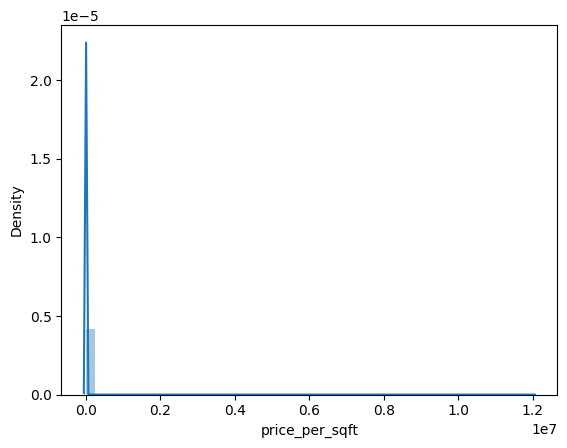

In [ ]:
sns.distplot(df['price_per_sqft'], kde=True)
plt.show()

<Axes: ylabel='price_per_sqft'>

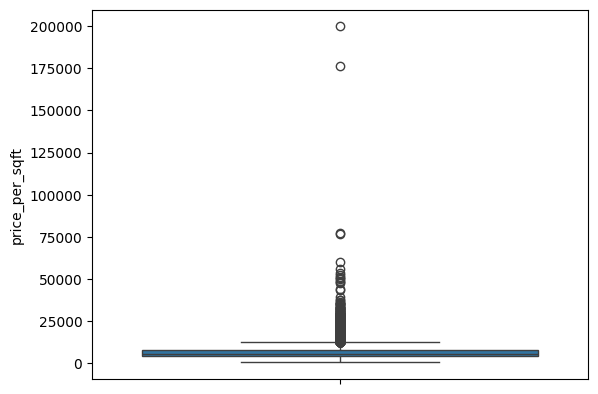

In [ ]:
sns.boxplot(df_mean_sd['price_per_sqft'])

## **Z-score method**

In [ ]:
# find the limits
upper_limit=df_mean_sd['price_per_sqft'].mean() + 3*df_mean_sd['price_per_sqft'].std()
lower_limit=df_mean_sd['price_per_sqft'].mean() - 3*df_mean_sd['price_per_sqft'].std()
print(f'Upper Limit: {upper_limit}')
print(f'Lower Limit: {lower_limit}')

Upper Limit: 21787.33991059734
Lower Limit: -8143.560724033862


In [ ]:
# find the outliers
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.0
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.0
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083.0
345,other,3 Bedroom,11.0,3.0,74.0,3,672727.0
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.0
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166.0
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260.0
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000.0


In [ ]:
# triming - delete the outlier data
new_df=df.loc[(df['price_per_sqft'] <= upper_limit) & (df['price_per_sqft'] >= lower_limit)]
print(f'Before removing outliers :{len(df)}')
print(f'After removing outliers :{len(new_df)}')
print(f'Number of outliers removed :{len(df)-len(new_df)}')

Before removing outliers :12151
After removing outliers :11981
Number of outliers removed :170


<Axes: ylabel='price_per_sqft'>

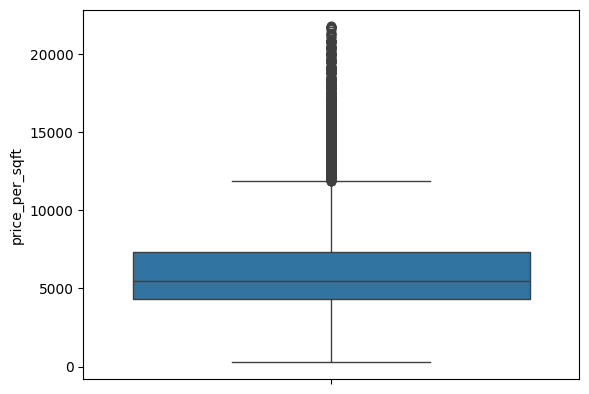

In [ ]:
sns.boxplot(new_df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

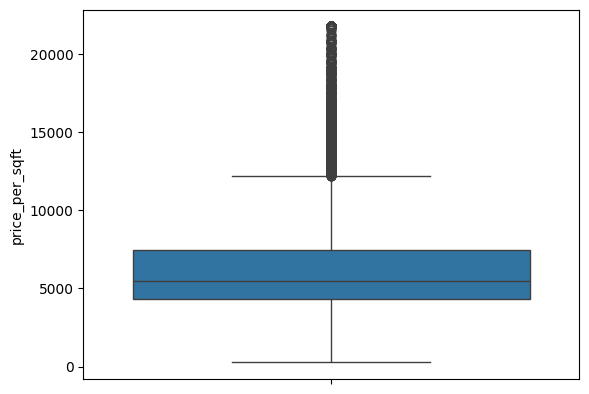

In [ ]:
# capping - change outlier values with upper limt value or lower limit value
df_Z_score = df.copy()
df_Z_score.loc[(df_Z_score['price_per_sqft'] > upper_limit), 'price_per_sqft'] = upper_limit
df_Z_score.loc[(df_Z_score['price_per_sqft'] < lower_limit), 'price_per_sqft'] = lower_limit
sns.boxplot(df_Z_score['price_per_sqft'])

In [ ]:
len(new_df)

11981

# **IQR Method**

In [ ]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr = q3 - q1
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')

Q1: 4312.0
Q3: 7461.0
IQR: 3149.0


In [ ]:
upper_limit=q3 + 1.5*iqr
lower_limit=q1 - 1.5*iqr
print(f'Upper Limit: {upper_limit}')
print(f'Lower Limit: {lower_limit}')

Upper Limit: 12184.5
Lower Limit: -411.5


<Axes: ylabel='price_per_sqft'>

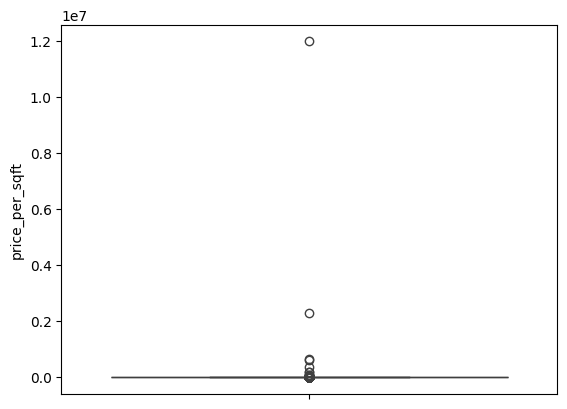

In [ ]:
sns.boxplot(df['price_per_sqft'])

In [ ]:
# find the outliers
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.0
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.0
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.0
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250.0
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396.0
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000.0
13142,other,2 BHK,1140.0,1.0,185.0,2,16228.0
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571.0


In [ ]:
# triming - delete the outlier data
new_df=df.loc[(df['price_per_sqft'] <= upper_limit) & (df['price_per_sqft'] >= lower_limit)]
print(f'Before removing outliers :{len(df)}')
print(f'After removing outliers :{len(new_df)}')
print(f'Number of outliers removed :{len(df)-len(new_df)}')

Before removing outliers :12151
After removing outliers :11009
Number of outliers removed :1142


<Axes: ylabel='price_per_sqft'>

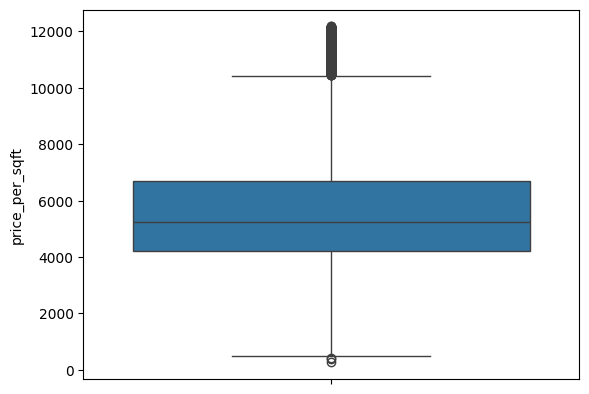

In [ ]:
sns.boxplot(new_df['price_per_sqft'])

In [ ]:
# capping - change outlier values with upper limt value or lower limit value
df_iqr = df.copy()
df_iqr.loc[(df_iqr['price_per_sqft'] > upper_limit), 'price_per_sqft'] = upper_limit
df_iqr.loc[(df_iqr['price_per_sqft'] < lower_limit), 'price_per_sqft'] = lower_limit

<Axes: ylabel='price_per_sqft'>

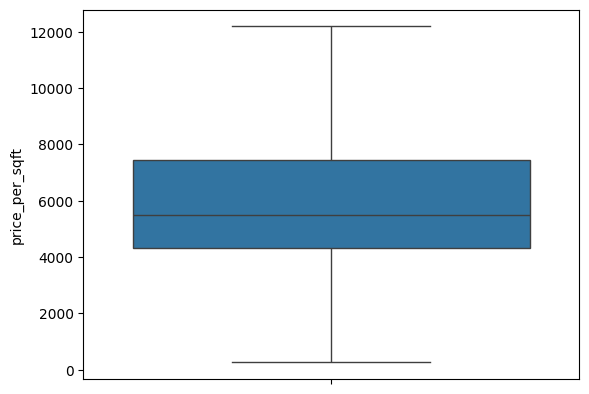

In [ ]:
sns.boxplot(df_iqr['price_per_sqft'])

## **Percentile method**

In [ ]:
upper_limit=df['price_per_sqft'].quantile(0.99)
lower_limit=df['price_per_sqft'].quantile(0.01)
print(f'Upper Limit: {upper_limit}')
print(f'Lower Limit: {lower_limit}')

Upper Limit: 24000.0
Lower Limit: 2532.0


<Axes: ylabel='price_per_sqft'>

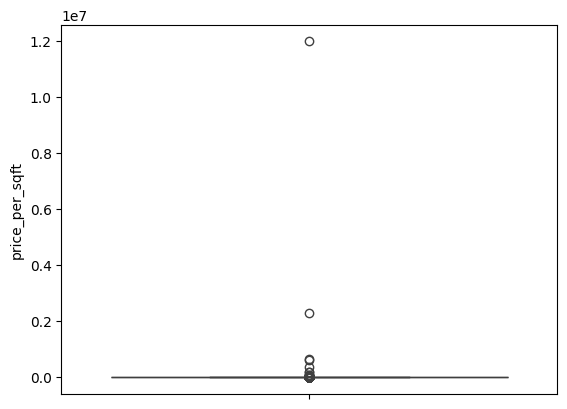

In [ ]:
sns.boxplot(df['price_per_sqft'])

In [ ]:
# find the outliers
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.0
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.0
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875.0
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444.0
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349.0
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166.0
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260.0
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000.0


In [ ]:
# triming - delete the outlier data
new_df=df.loc[(df['price_per_sqft'] <= upper_limit) & (df['price_per_sqft'] >= lower_limit)]
print(f'Before removing outliers :{len(df)}')
print(f'After removing outliers :{len(new_df)}')
print(f'Number of outliers removed :{len(df)-len(new_df)}')

Before removing outliers :12151
After removing outliers :11908
Number of outliers removed :243


<Axes: ylabel='price_per_sqft'>

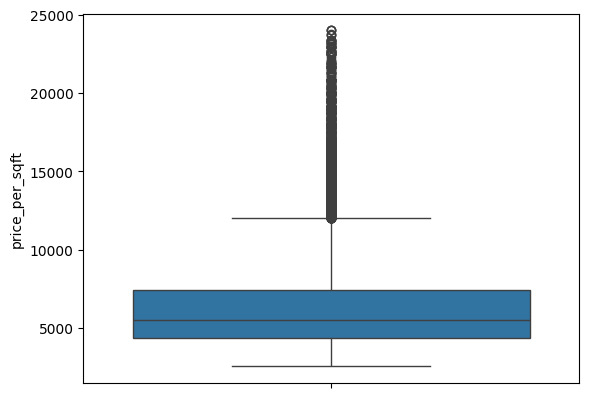

In [ ]:
sns.boxplot(new_df['price_per_sqft'])

In [ ]:
# capping - change outlier values with upper limt value or lower limit value
df_Percentile = df.copy()
df_Percentile.loc[(df_Percentile['price_per_sqft'] > upper_limit), 'price_per_sqft'] = upper_limit
df_Percentile.loc[(df_Percentile['price_per_sqft'] < lower_limit), 'price_per_sqft'] = lower_limit

<Axes: ylabel='price_per_sqft'>

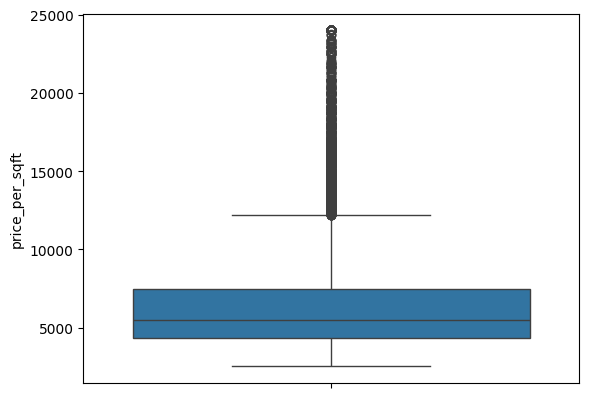

In [ ]:
sns.boxplot(df_Percentile['price_per_sqft'])


# **Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? **

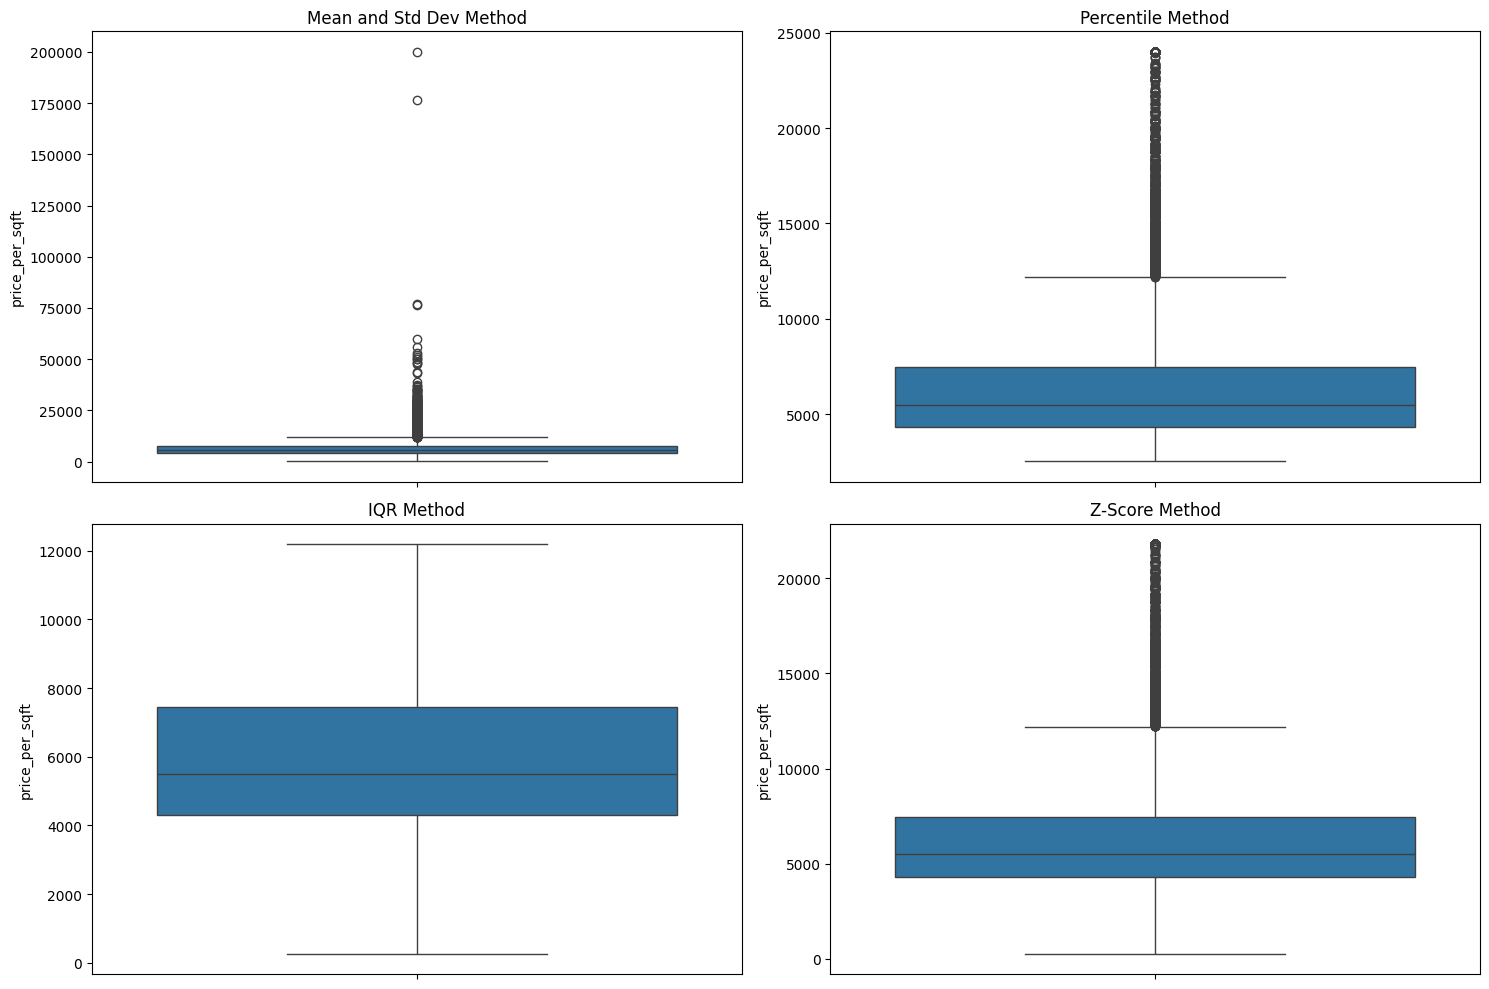

In [ ]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Mean and Standard Deviation Method
sns.boxplot(y=df_mean_sd['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('Mean and Std Dev Method')

# Percentile Method
sns.boxplot(y=df_Percentile['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Percentile Method')

# IQR Method
sns.boxplot(y=df_iqr['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('IQR Method')

# Z-Score Method
sns.boxplot(y=df_Z_score['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Z-Score Method')

plt.tight_layout()
plt.show()

# Which Method is Better for Removing Outliers?
Mean and Standard Deviation Method: This method is effective if the data is normally distributed, but it can be sensitive to extreme values. Percentile Method: This method is more robust to extreme outliers as it trims the extreme 5% from both ends. IQR Method: This method is robust and works well for skewed data, as it removes values beyond 1.5 times the IQR from the first and third quartiles. Z-Score Method: Keeps data with z-scores between -3 and 3.other data is removed Generally, the IQR Method and Percentile Method are often more robust and preferred for skewed distributions or data with extreme outliers. consider these data IQR and percentile method is more effective to remove outliers.However, the best method depends on the specific characteristics and requirements of your dataset.



# **Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.**

In [ ]:
df_skewness = skew(df['price_per_sqft'])
df_kurtosis = kurtosis(df['price_per_sqft'])
print(f"Original Skewness: {df_skewness}")
print(f"Original Kurtosis: {df_kurtosis}")

Original Skewness: 103.88920549434178
Original Kurtosis: 11131.230839805388


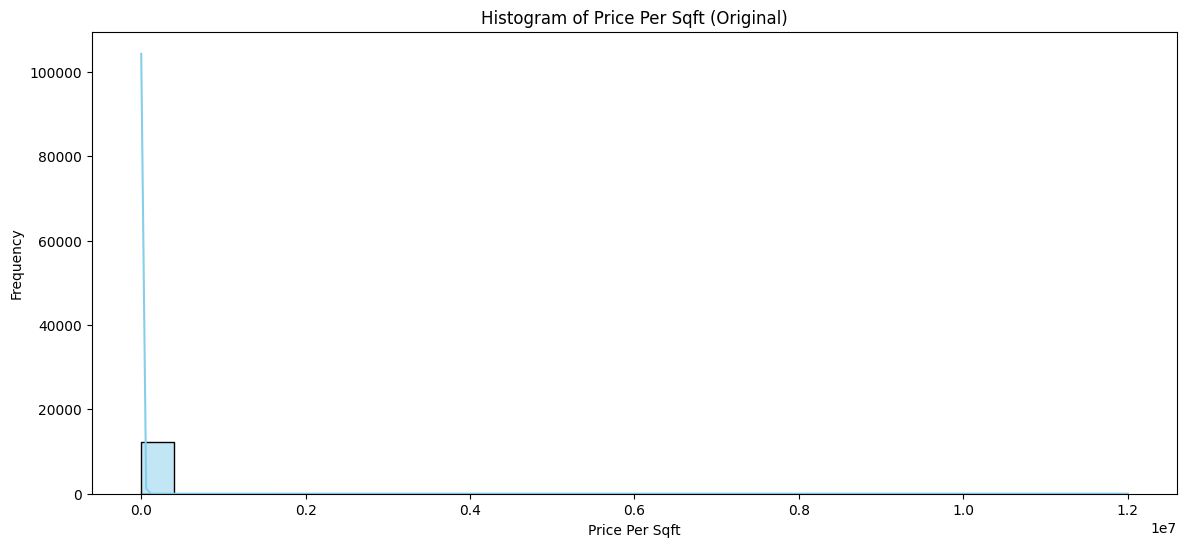

In [ ]:
# Original histogram and normality metrics
plt.figure(figsize=(14, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of Price Per Sqft (Original)')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# log transformation
df['price_per_sqft_log'] = np.log(df['price_per_sqft'])
df['price_per_sqft_log']

,price_per_sqft_log
0,8.215818
1,8.437067
2,8.367532
3,8.739536
4,8.354674
...,...
13194,8.784162
13195,8.808220
13196,9.315691
13197,8.567506


In [ ]:
# Compute skewness and kurtosis after transformation
transformed_skewness = skew(df['price_per_sqft_log'])
transformed_kurtosis = kurtosis(df['price_per_sqft_log'])
print(f"Transformed Skewness: {transformed_skewness}")
print(f"Transformed Kurtosis: {transformed_kurtosis}")

Transformed Skewness: 1.400238670119574
Transformed Kurtosis: 9.40102516314437


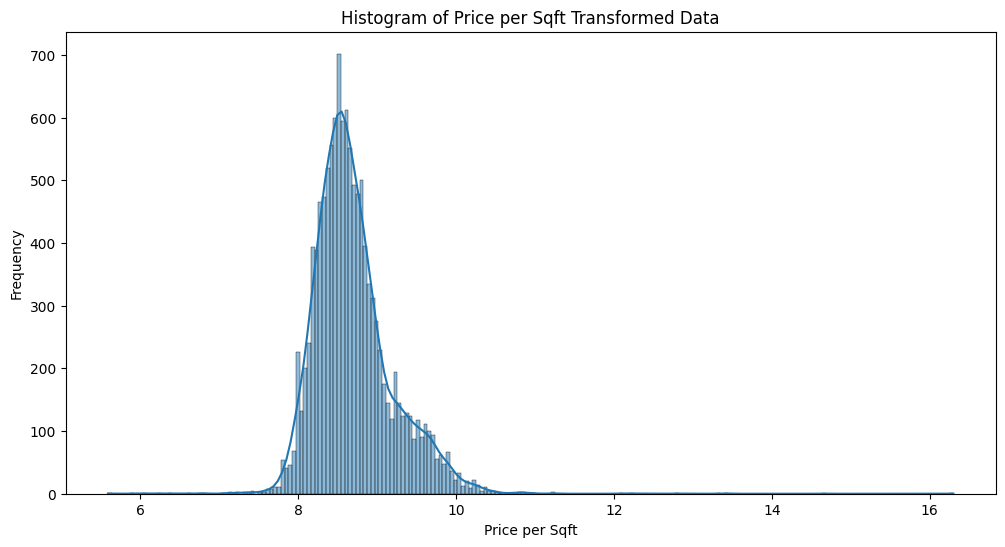

In [ ]:
# Plot histogram after transformation
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('Histogram of Price per Sqft Transformed Data')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

Distribution of price_per_sqft:

* Original data exhibits high skewness and kurtosis, indicating a non-normal distribution.

* Log transformation significantly reduces skewness, bringing the distribution closer to normal.




# **Q5. Check the correlation between all the numerical columns and plot heatmap.**

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,total_sqft,bath,price,bhk,price_per_sqft,price_per_sqft_log
total_sqft,1.000000,0.386694,0.572516,0.339936,-0.008877,0.099992
bath,0.386694,1.000000,0.448802,0.898875,0.030133,0.424463
price,0.572516,0.448802,1.000000,0.390008,0.027415,0.581634
bhk,0.339936,0.898875,0.390008,1.000000,0.030294,0.405738
price_per_sqft,-0.008877,0.030133,0.027415,0.030294,1.000000,0.205191
price_per_sqft_log,0.099992,0.424463,0.581634,0.405738,0.205191,1.000000


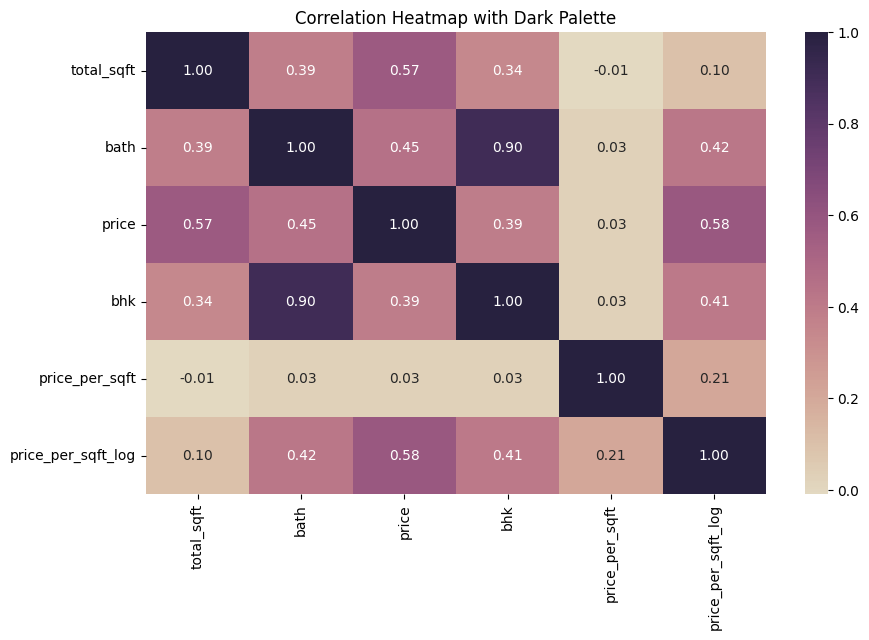

In [ ]:
# Create a dark palette for the heatmap
dark_palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)


# Plot the heatmap with the dark palette
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=dark_palette, fmt='.2f')
plt.title('Correlation Heatmap with Dark Palette')
plt.show()

Correlation Insights:

* The heatmap reveals a strong positive correlation between price and total_sqft.
* Moderate correlations exist between price_per_sqft and price.



# **Q6. Draw Scatter plot between the variables to check the correlation between them.**

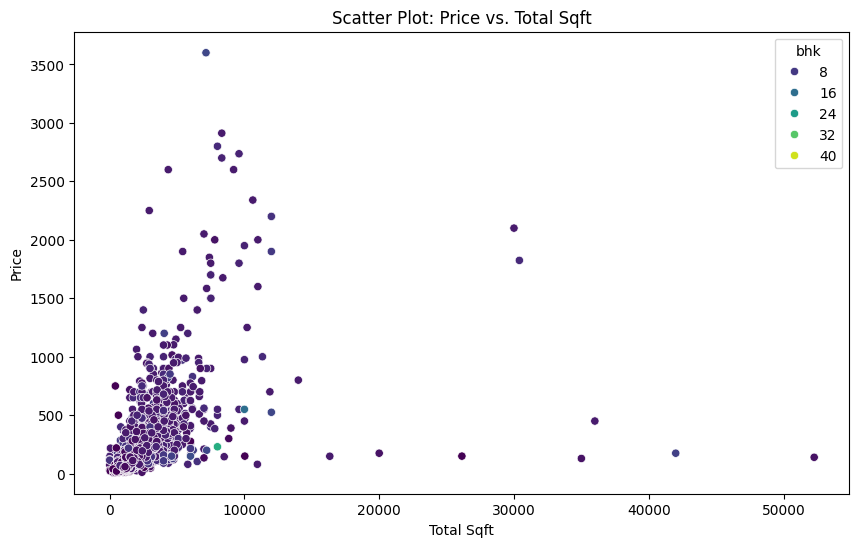

In [ ]:
# Scatter plot between price and total_sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_sqft', y='price', hue='bhk', palette='viridis')
plt.title('Scatter Plot: Price vs. Total Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()

<ipython-input-184-ecbb8f52e9e8>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='bhk', y='price_per_sqft', palette='magma')


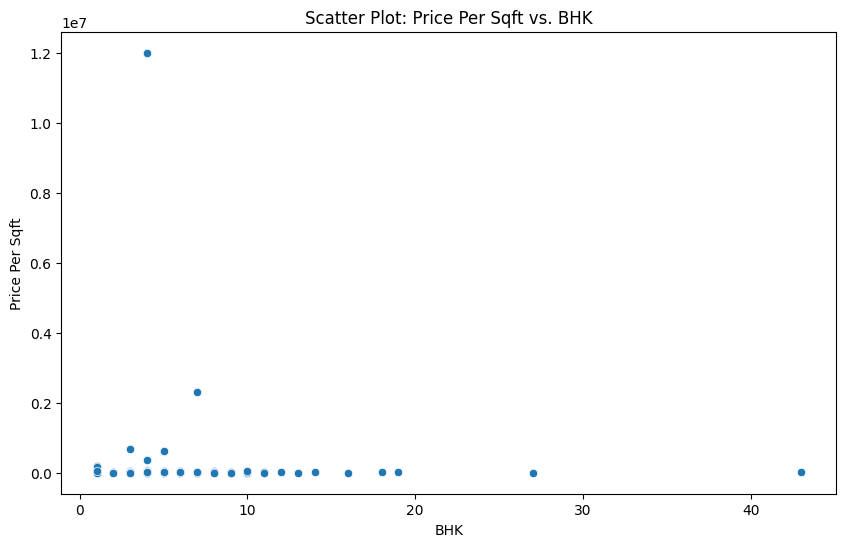

In [ ]:
# Scatter plot between price_per_sqft and bhk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bhk', y='price_per_sqft', palette='magma')
plt.title('Scatter Plot: Price Per Sqft vs. BHK')
plt.xlabel('BHK')
plt.ylabel('Price Per Sqft')
plt.show()

Scatter Plot Observations:

* A linear relationship is evident between price and total_sqft, suggesting larger properties generally cost more.
* price_per_sqft varies significantly, likely influenced by location or other factors.